# Project: TMDb Movie Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

**This dataset contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.The dataset has the following columns:**

- Id, Imdb_id, Popularity, Budget 
- Revenue, Original_title, Cast, Homepage 
- Director, Tagline, Keywords, Overview
- Runtime, Genres, Production_companies 
- Release_date, Vote_count, Vote_average 
- Release_year, Budget_adj, Revenue_adj

**Questions To Explore !!**

- What Are The Top 5 Movies By Revenue ?
- What Are The Top 5 Movies By Budget ?
- What Are The Top 5 Movies By Vote Rating ?
- What Are The Top 5 Movies By Popularity ?
- Distribustion Of Vote Average
- Distribustion Of Popularity
- Effect Of Vote_Count On Revenue
- Effect Of Budget On Revenue
- Effect Of Popularity On Revenue.
- Effect Of Vote Count On Popularity
- Timeline Of Number Of Movies Made Every Year
- Timeline Of Total Budget And Revenue Made Every Year

In [22]:
#Required Imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
plt.rcParams["patch.force_edgecolor"] = True
%matplotlib inline
sns.set_style('whitegrid')

<a id='wrangling'></a>
## Data Wrangling

**Lets explore data structure and find out whether we can remove some columns and clean up some data.**

### General Properties

In [23]:
#Loading The Movie Data Into A Dataframe
movie_data = pd.read_csv('tmdb-movies.csv')
movie_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

- **From the output of info function we can observe that columns like cast, homepage, director, tagline, keywords, overview, genres, production_companies are having missing values.**



- **Now lets use describe function to compute statistics on numerical columns **

In [24]:
movie_data.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [25]:
movie_data.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


### Data Cleaning

**The following columns wont't be much useful for analysis: **
- id
- imdb_id
- homepage
- tagline
- overview
- keywords
- budget_adj,
- revenue_adj


**So, Lets drop them from the Dataframe**

In [26]:
#Dropping The Unnecessary Columns 
movie_data.drop(['id','imdb_id','homepage','tagline','overview','keywords','budget_adj','revenue_adj'], axis=1, inplace=True)
movie_data.head(2)

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015


- **Let's drop duplicate rows from the dataset**

In [27]:
movie_data.drop_duplicates(inplace=True)
movie_data.shape

(10865, 13)

<a id='eda'></a>
## Exploratory Data Analysis
### What Are The Top 5 Movies By Revenue ?

In [28]:
movie_data[['original_title','revenue']].sort_values('revenue', ascending=False)[:5]

,original_title,revenue
1386,Avatar,2781505847
3,Star Wars: The Force Awakens,2068178225
5231,Titanic,1845034188
4361,The Avengers,1519557910
0,Jurassic World,1513528810


### What Are The Top 5 Movies By Budget ?

In [29]:
movie_data[['original_title','budget']].sort_values('budget', ascending=False)[:5]

,original_title,budget
2244,The Warrior's Way,425000000
3375,Pirates of the Caribbean: On Stranger Tides,380000000
7387,Pirates of the Caribbean: At World's End,300000000
14,Avengers: Age of Ultron,280000000
6570,Superman Returns,270000000


### What Are The Top 5 Movies By Vote Rating ?

In [30]:
movie_data[['original_title','vote_average']].sort_values('vote_average', ascending=False)[:5]

,original_title,vote_average
3894,The Story of Film: An Odyssey,9.2
538,The Mask You Live In,8.9
1200,Black Mirror: White Christmas,8.8
2269,Life Cycles,8.8
6911,Pink Floyd: Pulse,8.7


### What Are The Top 5 Movies By Popularity ?

In [31]:
movie_data[['original_title','popularity']].sort_values('popularity', ascending=False)[:5]

,original_title,popularity
0,Jurassic World,32.985763
1,Mad Max: Fury Road,28.419936
629,Interstellar,24.949134
630,Guardians of the Galaxy,14.311205
2,Insurgent,13.112507


### Distribustion Of Vote Average

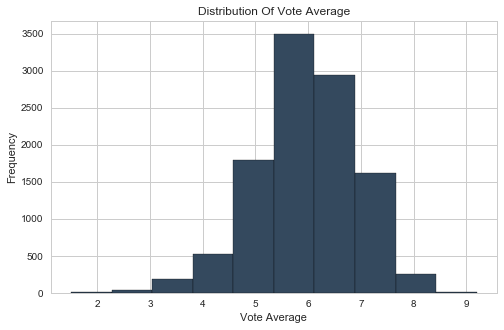

In [32]:
plt.figure(figsize=(8,5))
plt.hist(movie_data['vote_average'], bins=10, color='#34495e');
plt.xlabel('Vote Average')
plt.ylabel('Frequency')
plt.title('Distribution Of Vote Average');

**-The above plot shows that most of the movies received a rating around 6.**

### Distribustion Of Popularity

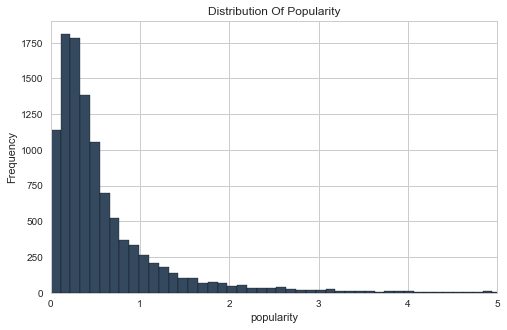

In [33]:
plt.figure(figsize=(8,5))
plt.hist(movie_data['popularity'], bins=300, color='#34495e');
plt.xlabel('popularity')
plt.ylabel('Frequency')
plt.xlim(0,5)
plt.title('Distribution Of Popularity');

**- The above distributuon shows that popularity of most movies lies b/w 0 and 1**

### Distribustion Of Runtime

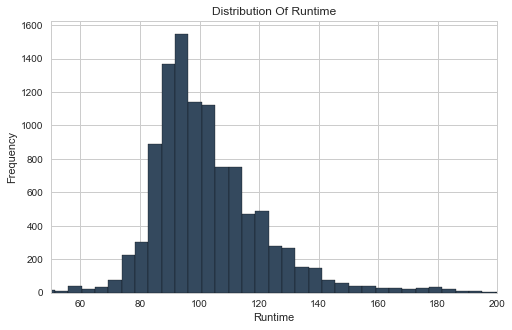

In [48]:
nonZeros = movie_data['runtime']!=0
plt.figure(figsize=(8,5))
plt.hist(movie_data[nonZeros]['runtime'], bins=200,color='#34495e');
plt.xlabel('Runtime')
plt.ylabel('Frequency')
plt.xlim(50,200)
plt.title('Distribution Of Runtime');


**Now lets explore few bivariate relationships**

In [35]:
movie_data.corr()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year
popularity,1.000000,0.545481,0.663360,0.139032,0.800828,0.209517,0.089806
budget,0.545481,1.000000,0.734928,0.191300,0.632719,0.081067,0.115904
revenue,0.663360,0.734928,1.000000,0.162830,0.791174,0.172541,0.057070
runtime,0.139032,0.191300,0.162830,1.000000,0.163273,0.156813,-0.117187
vote_count,0.800828,0.632719,0.791174,0.163273,1.000000,0.253818,0.107962
vote_average,0.209517,0.081067,0.172541,0.156813,0.253818,1.000000,-0.117576
release_year,0.089806,0.115904,0.057070,-0.117187,0.107962,-0.117576,1.000000


- **Let's use above correlation matrix to explore how revenue of a movie is being effected by other variables.**

### Effect Of Vote_Count On Revenue.

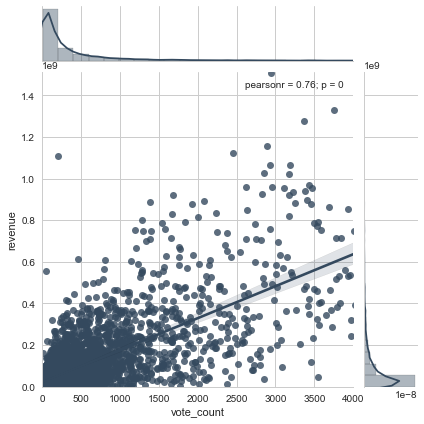

In [37]:
rev_non_zeros = movie_data['revenue'] != 0
sns.jointplot(data=movie_data[rev_non_zeros], y='revenue', x='vote_count', kind='reg', color='#34495e')
plt.xlim(0,4000)
plt.ylim(0, 1513528810);

**- There seems to be a positive linear realtionship between revenue and popularity, as the voute_count increases, revenue seems to increase**

### Effect Of Budget On Revenue.

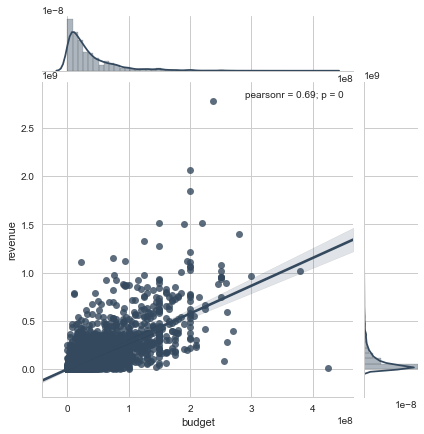

In [39]:
rev_bdj_non_zeros = (movie_data['revenue'] != 0) & (movie_data['budget'] != 0) 
sns.jointplot(data=movie_data[rev_bdj_non_zeros], y='revenue', x='budget', kind='reg', color='#34495e')

**- The above plot shows that there is a linear relation b/w budget and revenue. The more the budget of the movie, the more revenue, except for few ouliers.**

### Effect Of Popularity On Revenue.

(0, 1513528810)

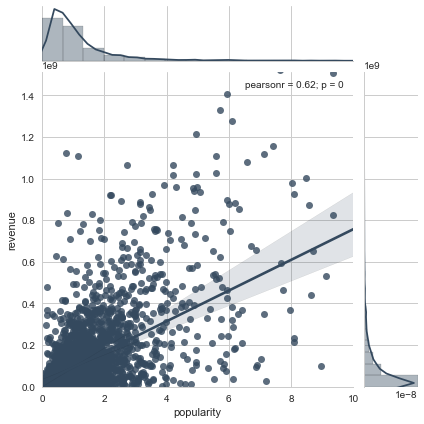

In [40]:
sns.jointplot(data=movie_data[rev_non_zeros], x='popularity', y='revenue', kind='reg', color='#34495e')
plt.xlim(0,10)
plt.ylim(0, 1513528810)

**- The Popularity seems to have positive relationship with revenue, the more popular the movie is, more the revenue it earned.**
### Effect Of Vote Count On Popularity

(0, 5000)

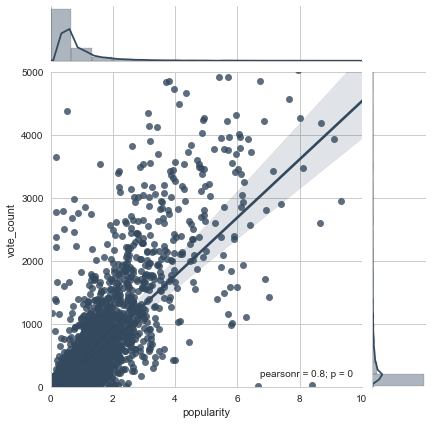

In [41]:
sns.jointplot(data=movie_data, x='popularity', y='vote_count', kind='reg', color='#34495e')
plt.xlim(0,10)
plt.ylim(0,5000)

### Timeline Of Number Of Movies Made Every Year

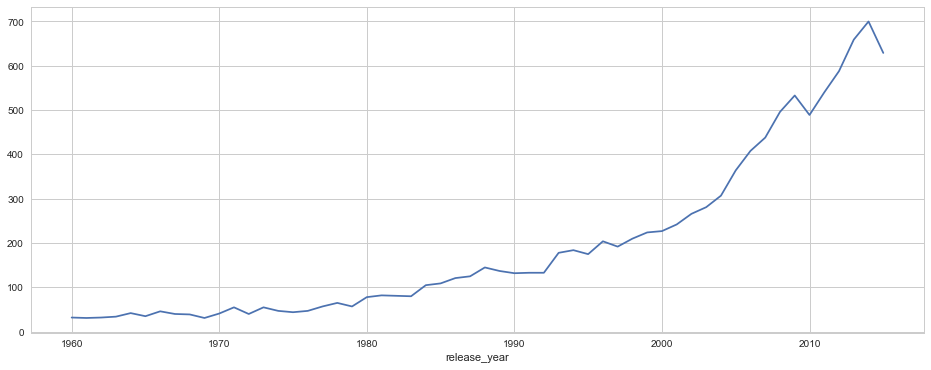

In [73]:
plt.figure(figsize=(16,6))
movie_data.groupby('release_year').count()['budget'].plot.line()

### Timeline Of Total Budget And Revenue Made Every Year

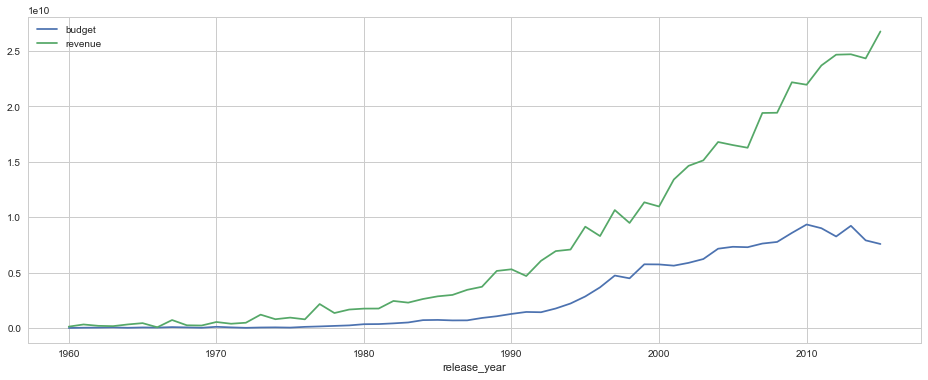

In [72]:
movie_data.groupby('release_year').sum()[['budget', 'revenue']].plot.line(figsize=(16,6))

<a id='conclusions'></a>
## Conclusions

As part of this project, I explored univariate distributions of popularity and vote average and found that most of the movies have popularity rating b/w 0 and 1 and their vote average lies around 6. Similarly explored bivariate realationship b/w revenue and other variables like popularity, budget, and vote count and found that they seem to have a positive impact on revenue and created timelines to see overall trend of number of movies made every year and money invested and revenue made.